In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image as PILImage
from mcp.server.fastmcp import FastMCP, Image
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

import logging
# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)
logger = logging.getLogger(__name__)


In [9]:
mol = Chem.MolFromSmiles("CNC1=CC(NC2=CC=CN(C2=O)C3=CC=CC=N3)=NC4=C(C=NN14)C(=O)N[C@@H]5CC[C@H]5OC")

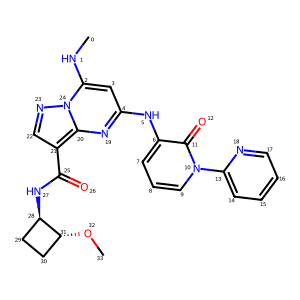

In [10]:
mol

In [4]:
def visualize_molecule(query: str, width: int = 400, height: int = 300, 
                      show_atom_indices: bool = False) -> Image:
    """Generate a 2D visualization of a molecule.
    
    Args:
        query: Molecule name or SMILES string
        width: Width of the output image in pixels
        height: Height of the output image in pixels
        show_atom_indices: Whether to show atom indices in the visualization
        
    Returns:
        Image object containing the molecule visualization
    """
    try:
        smiles = query.strip()        
        # Try to create a molecule from the SMILES string
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is None:
            raise ValueError(f"Could not parse '{query}' as a valid molecule. Please provide a valid SMILES string or use a common molecule name.")
        
        # Generate 2D coordinates if they don't exist
        if not mol.GetNumConformers():
            AllChem.Compute2DCoords(mol)
        
        # Create a drawing object
        drawer = rdMolDraw2D.MolDraw2DCairo(width, height)
        
        # Configure drawing options
        opts = drawer.drawOptions()
        if show_atom_indices:
            opts.addAtomIndices = True
        
        # Draw the molecule
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        
        # Get the PNG data
        png_data = drawer.GetDrawingText()
        
        # Return as Image object
        return Image(data=png_data, format="png")
    
    except Exception as e:
        logger.error(f"Error visualizing molecule: {str(e)}")
        raise


In [6]:
res = visualize_molecule("CNC1=CC(NC2=CC=CN(C2=O)C3=CC=CC=N3)=NC4=C(C=NN14)C(=O)N[C@@H]5CC[C@H]5OC")